#### 실습 과제
mtcars.csv 데이터 셋에서 mpg 예측모델을 생성하기 위해 필요한 전처리 및 탐색적 분석을 수행한 결과로 데이터셋을 도출한 후 주어진 모델링 및 평가코드를 적용하여 결과를 출력하세요.

[데이터 셋 변수 설명]

- mpg: 연비(miles per gallon)
- cyl: 실린더 개수(number of cylinders)
- disp: 배기량(displacement)
- hp: 마력(horsepower)
- drat: 후륜비(rear axle ratio)
- wt: 차량 무게(weight)
- qsec: 1/4 마일 달성 시간(1/4 mile time)
- vs: 엔진 형태(V/S)
- am: 변속기 종류(automatic or manual)
- gear: 기어 수(number of gears)
- carb: 기화기 개수(number of carburetors)


#### 1) 데이터불러오기 > info() > 결측치,문제,컬럼,데이터타입, 통계적요약, describe, value_counts, unique >
#### 2) 변수선택 : 중요변수 탐색 > 상관관계, 변수분포(종속,독립변수 간 값 높을수록 좋음) (독립변수간 값 낮을수록 좋음) > 탐색적 분석 추가(파생변수 vs 종속변수 상관관계) >
#### 3) 데이터셋 제작 : 표준화, 정규화 > 분석용 데이터셋에 적용

#### 연비(mpg)를 측정하는데 다른 컬럼들과의 상관관계를 찾기 + 알고리즘에 적용할 수 있는 데이터셋을 만들기.
#### 데이터탐색, 전처리! 전처리를 어떻게 하느냐에 따라 수치 변함.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv
Saving mtcars.csv to mtcars.csv


In [ ]:
!ls

auto-mpg.csv  mtcars.csv  sample_data


In [ ]:
# 모델 구축 - 데이터셋 품질 확인용
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#데이터 불러오기
file_path= '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/mtcars.csv' #드라이브 마운트 불러오기.
# file_path = 'mtcars.csv' # 선택 파일 불러오기.
df = pd.read_csv(file_path,index_col=0)

df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 4.0+ KB


In [ ]:
# mpg 컬럼 값 구성 체크
print(df.mpg.value_counts())
print()
print(len(df.mpg.value_counts()))

mpg
21.0    2
19.2    2
30.4    2
22.8    2
15.2    2
10.4    2
21.4    2
33.9    1
19.7    1
15.8    1
26.0    1
27.3    1
13.3    1
15.5    1
21.5    1
24.4    1
14.3    1
32.4    1
14.7    1
18.7    1
18.1    1
17.3    1
16.4    1
17.8    1
15.0    1
Name: count, dtype: int64

25


In [ ]:
# mpg 칼럼의 고유 구성 요소
len(df.mpg.unique())
df.mpg.unique()

array([21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 19.2, 17.8, 16.4, 17.3,
       15.2, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5, 13.3, 27.3, 26. ,
       15.8, 19.7, 15. ])

In [ ]:
# 데이터 통계적 요약
description = df.describe()
print(description)

             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  cyl_mpg_corr  \
count  32.000000  32.000000  32.000000  32.000000  32.0000     32.000000   
mean   17.848750   0.437500   0.406250   3.687500   2.8125     20.090625   
std     1.786943   0.504016   0.498991   0.737804   1.6152      5.158096   
mi

In [ ]:
# 데이터 결측치 여부 확인
missing_values = df.isna()

print(missing_values)

                       mpg    cyl   disp     hp   drat     wt   qsec     vs  \
Mazda RX4            False  False  False  False  False  False  False  False   
Mazda RX4 Wag        False  False  False  False  False  False  False  False   
Datsun 710           False  False  False  False  False  False  False  False   
Hornet 4 Drive       False  False  False  False  False  False  False  False   
Hornet Sportabout    False  False  False  False  False  False  False  False   
Valiant              False  False  False  False  False  False  False  False   
Duster 360           False  False  False  False  False  False  False  False   
Merc 240D            False  False  False  False  False  False  False  False   
Merc 230             False  False  False  False  False  False  False  False   
Merc 280             False  False  False  False  False  False  False  False   
Merc 280C            False  False  False  False  False  False  False  False   
Merc 450SE           False  False  False  False  Fal

### 실린더 개수(cyl)와 연비(mpg):
일반적으로 실린더 개수가 많을수록 엔진 크기와 배기량이 증가하여 연비가 감소하는 경향이 있습니다.
상관관계: 음의 상관관계 (실린더 개수 증가 -> 연비 감소)

### 배기량(disp)와 연비(mpg):
배기량이 클수록 연료 소비가 많아져 연비가 감소합니다.
상관관계: 음의 상관관계 (배기량 증가 -> 연비 감소)

### 마력(hp)와 연비(mpg):
마력이 높을수록 엔진의 성능이 높아지지만, 이는 연료 소모가 많아져 연비가 감소할 수 있습니다.
상관관계: 음의 상관관계 (마력 증가 -> 연비 감소)

### 후륜비(drat)와 연비(mpg):
후륜비는 차량의 가속 성능과 관련이 있으며, 후륜비가 높으면 가속이 빨라지지만 연비가 감소할 수 있습니다.
상관관계: 음의 상관관계 (후륜비 증가 -> 연비 감소)

### 차량 무게(wt)와 연비(mpg):
차량 무게가 무거울수록 연비가 감소합니다.
상관관계: 음의 상관관계 (차량 무게 증가 -> 연비 감소)

### 1/4 마일 달성 시간(qsec)와 연비(mpg):
1/4 마일 달성 시간이 길면 차량의 가속 성능이 낮음을 의미할 수 있으며, 이는 연비와 다양한 방식으로 상관관계를 가질 수 있습니다. 일반적으로 가속 성능이 낮으면 연비가 높을 수 있습니다.
상관관계: 양의 상관관계 (1/4 마일 시간 증가 -> 연비 증가)

### 엔진 형태(vs)와 연비(mpg):
엔진 형태가 V형(V)인지 직렬형(S)인지에 따라 연비가 달라질 수 있습니다. 일반적으로 V형 엔진이 더 크고 연비가 낮을 수 있습니다.
상관관계: 엔진 형태에 따라 달라짐 (V형 -> 연비 낮음, 직렬형 -> 연비 높음)

### 변속기 종류(am)와 연비(mpg):
자동변속기(0)와 수동변속기(1)에 따라 연비가 달라질 수 있습니다. 일반적으로 수동변속기가 연비가 더 좋습니다.
상관관계: 변속기 종류에 따라 달라짐 (수동 -> 연비 높음, 자동 -> 연비 낮음)

### 기어 수(gear)와 연비(mpg):
기어 수가 많을수록 엔진의 효율성이 증가하여 연비가 높아질 수 있습니다.
상관관계: 양의 상관관계 (기어 수 증가 -> 연비 증가)

### 기화기 개수(carb)와 연비(mpg):
기화기 개수가 많을수록 연료 공급이 많아져 연비가 감소할 수 있습니다.
상관관계: 음의 상관관계 (기화기 개수 증가 -> 연비 감소)

시각화 함수 종류
1. 산점도(Scatter): sns.scatterplot(x='x_variable', y='y_variable', data=dataframe)

2. 히스토그램: sns.histplot(data=dataframe['column'], bins=10)

3. Line : sns.lineplot(x='x_variable', y='y_variable', data=dataframe)

4. Box :sns.boxplot(x='x_variable', y='y_variable', data=dataframe)

5. 막대그래프 : sns.barplot(x='category', y='value', data=dataframe)

6. 히트맵(Heatmap): sns.heatmap(data=dataframe.corr(), annot=True, cmap='coolwarm') - 전체 상관관계 요약

7. 바이올린 플롯(Violin Plot): sns.violinplot(x='category', y='value', data=dataframe)

8. 관계 그래프(Pair Plot): sns.pairplot(data=dataframe)
 - 대각선 : 히스토그램, 비대각 요소 : 산점도

9. 파이 차트(Pie Chart):plt.pie(dataframe['category'].value_counts(), labels=dataframe['category'].unique(), autopct='%1.1f%%')

10. 밀도 플롯(Kernel Density Plot):sns.kdeplot(data=dataframe['value'], shade=True)

11. 3D 플롯(3D Plot): fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataframe['x'], dataframe['y'], dataframe['z'])

          cyl       mpg
cyl  1.000000 -0.852162
mpg -0.852162  1.000000 



<ipython-input-75-6866d6b3f338>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cyl', y='mpg', ci=None, data=df)


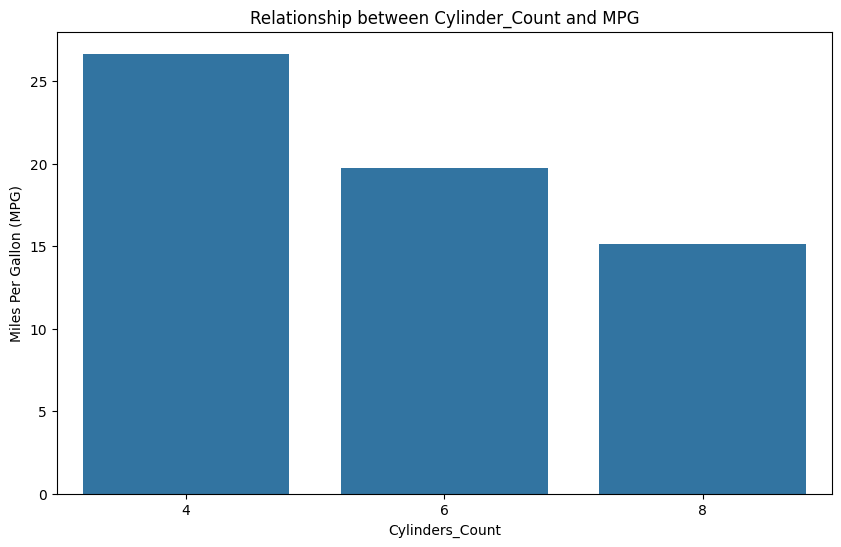

In [ ]:
# 실린더 개수(cyl)와 연비(mpg) 상관관계
cyl_mpg_corr = df[['cyl', 'mpg']].corr()
print(cyl_mpg_corr,'\n')

plt.figure(figsize=(10, 6))
sns.barplot(x='cyl', y='mpg', ci=None, data=df)
plt.title('Relationship between Cylinder_Count and MPG')
plt.xlabel('Cylinders_Count')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()


cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64 



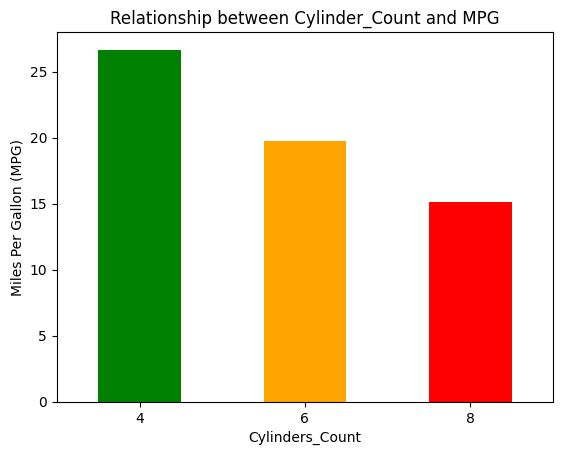

In [ ]:
cyl_mpg_corr2 = df.groupby('cyl')['mpg'].mean()
print(cyl_mpg_corr2,'\n')

cyl_mpg_corr2.plot(kind='bar', color=['green','orange','red'])
plt.title('Relationship between Cylinder_Count and MPG')
plt.xlabel('Cylinders_Count')
plt.ylabel('Miles Per Gallon (MPG)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# 실린더 개수(cyl)와 연비(mpg) Test

# 회귀 모델 구축
X = df[['cyl']]
y = df['mpg']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 13.06
Root Mean Squared Error: 3.61
R-squared: 0.67


          disp       mpg
disp  1.000000 -0.847551
mpg  -0.847551  1.000000 



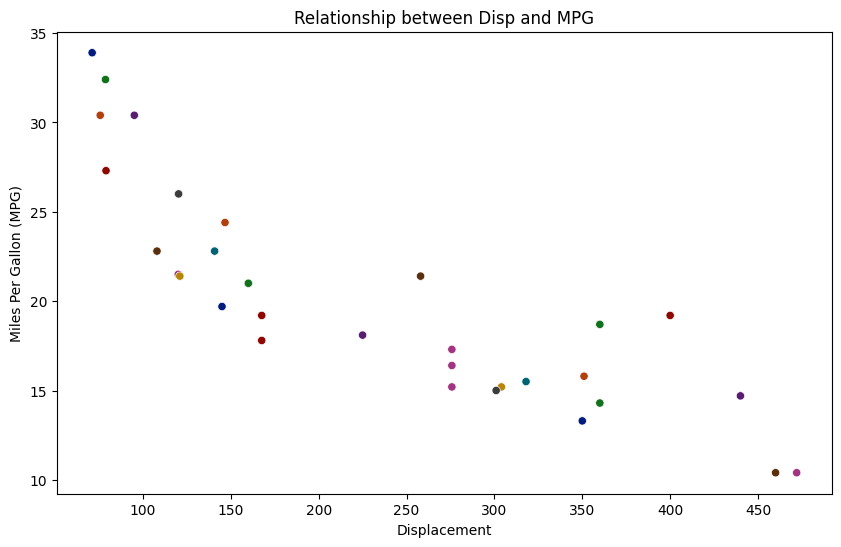

In [ ]:
# 배기량(disp)와 연비(mpg) 상관관계
disp_mpg_corr = df[['disp', 'mpg']].corr()
print(disp_mpg_corr,'\n')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='disp', y='mpg', hue='disp', palette='dark', data=df, legend=False)
plt.title('Relationship between Disp and MPG')
plt.xlabel('Displacement')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

In [ ]:
# 배기량(disp)와 연비(mpg) Test

# 회귀 모델 구축
X = df[['disp']]
y = df['mpg']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 15.61
Root Mean Squared Error: 3.95
R-squared: 0.61


           hp       mpg
hp   1.000000 -0.776168
mpg -0.776168  1.000000 



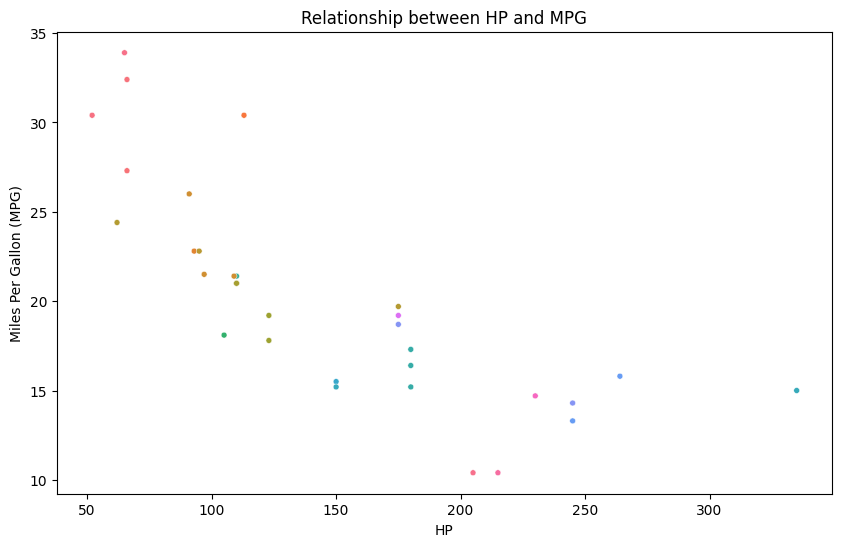

In [ ]:
# 마력(hp)와 연비(mpg) 상관관계
hp_mpg_corr = df[['hp', 'mpg']].corr()
print(hp_mpg_corr,'\n')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='hp', y='mpg', hue='disp', palette='husl', size=100**2, data=df, legend=False)
plt.title('Relationship between HP and MPG')
plt.xlabel('HP')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

In [ ]:
# 마력(hp)와 연비(mpg) Test

# 회귀 모델 구축
X = df[['hp']]
y = df['mpg']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 24.01
Root Mean Squared Error: 4.9
R-squared: 0.4


           wt       mpg
wt   1.000000 -0.867659
mpg -0.867659  1.000000 



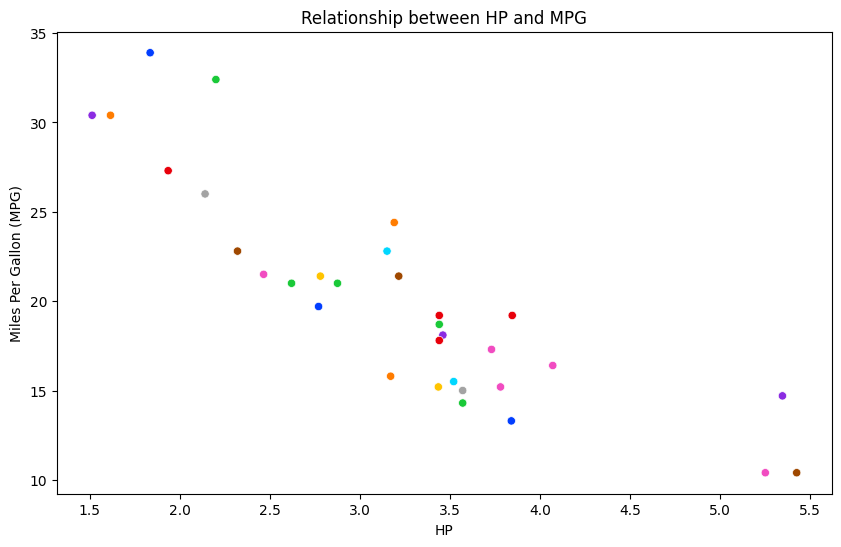

In [ ]:
# 차량 무게(wt)와 연비(mpg) 상관관계
wt_mpg_corr = df[['wt', 'mpg']].corr()
print(wt_mpg_corr,'\n')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='wt', y='mpg', hue='disp', palette='bright', data=df, legend=False)
plt.title('Relationship between HP and MPG')
plt.xlabel('HP')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

In [ ]:
# 차량 무게(wt)와 연비(mpg) Test
# 회귀 모델 구축
X = df[['wt']]
y = df['mpg']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 12.48
Root Mean Squared Error: 3.53
R-squared: 0.69


gear
4    24.533333
5    21.380000
3    16.106667
Name: mpg, dtype: float64 



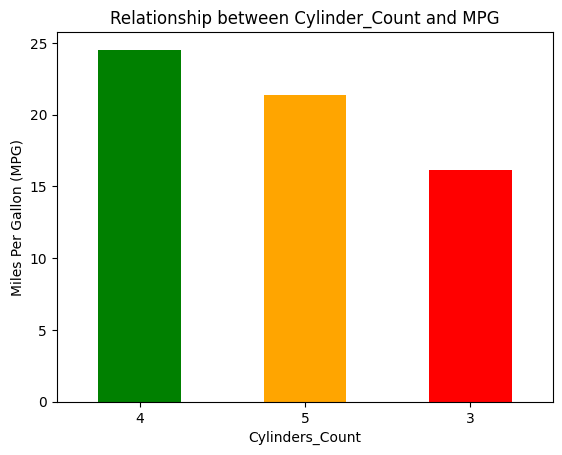

In [ ]:
# 기어 수(gear)와 연비(mpg) 상관관계
gear_mpg_corr = df.groupby('gear')['mpg'].mean().sort_values(ascending=False)
print(gear_mpg_corr,'\n')

gear_mpg_corr.plot(kind='bar', color=['green','orange','red'])
plt.title('Relationship between Cylinder_Count and MPG')
plt.xlabel('Cylinders_Count')
plt.ylabel('Miles Per Gallon (MPG)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# 기어 수(gear)와 연비(mpg) Test
# 회귀 모델 구축
X = df[['gear']]
y = df['mpg']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 53.5
Root Mean Squared Error: 7.31
R-squared: -0.34
